<a href="https://colab.research.google.com/github/keerthi97/CODSOFT/blob/main/CODSOFT_IRIS_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/keerthi97/CODSOFT/blob/90dd682f78db6a62b0892a47356e4392f5e9e2c4/datasets/IRIS.csv?raw=true", encoding='utf-8', encoding_errors='ignore')

In [ ]:
print(len(df))
print(df.dtypes)
print(df.info)
df.head()

150
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.nunique()

,0
sepal_length,35
sepal_width,23
petal_length,43
petal_width,22
species,3


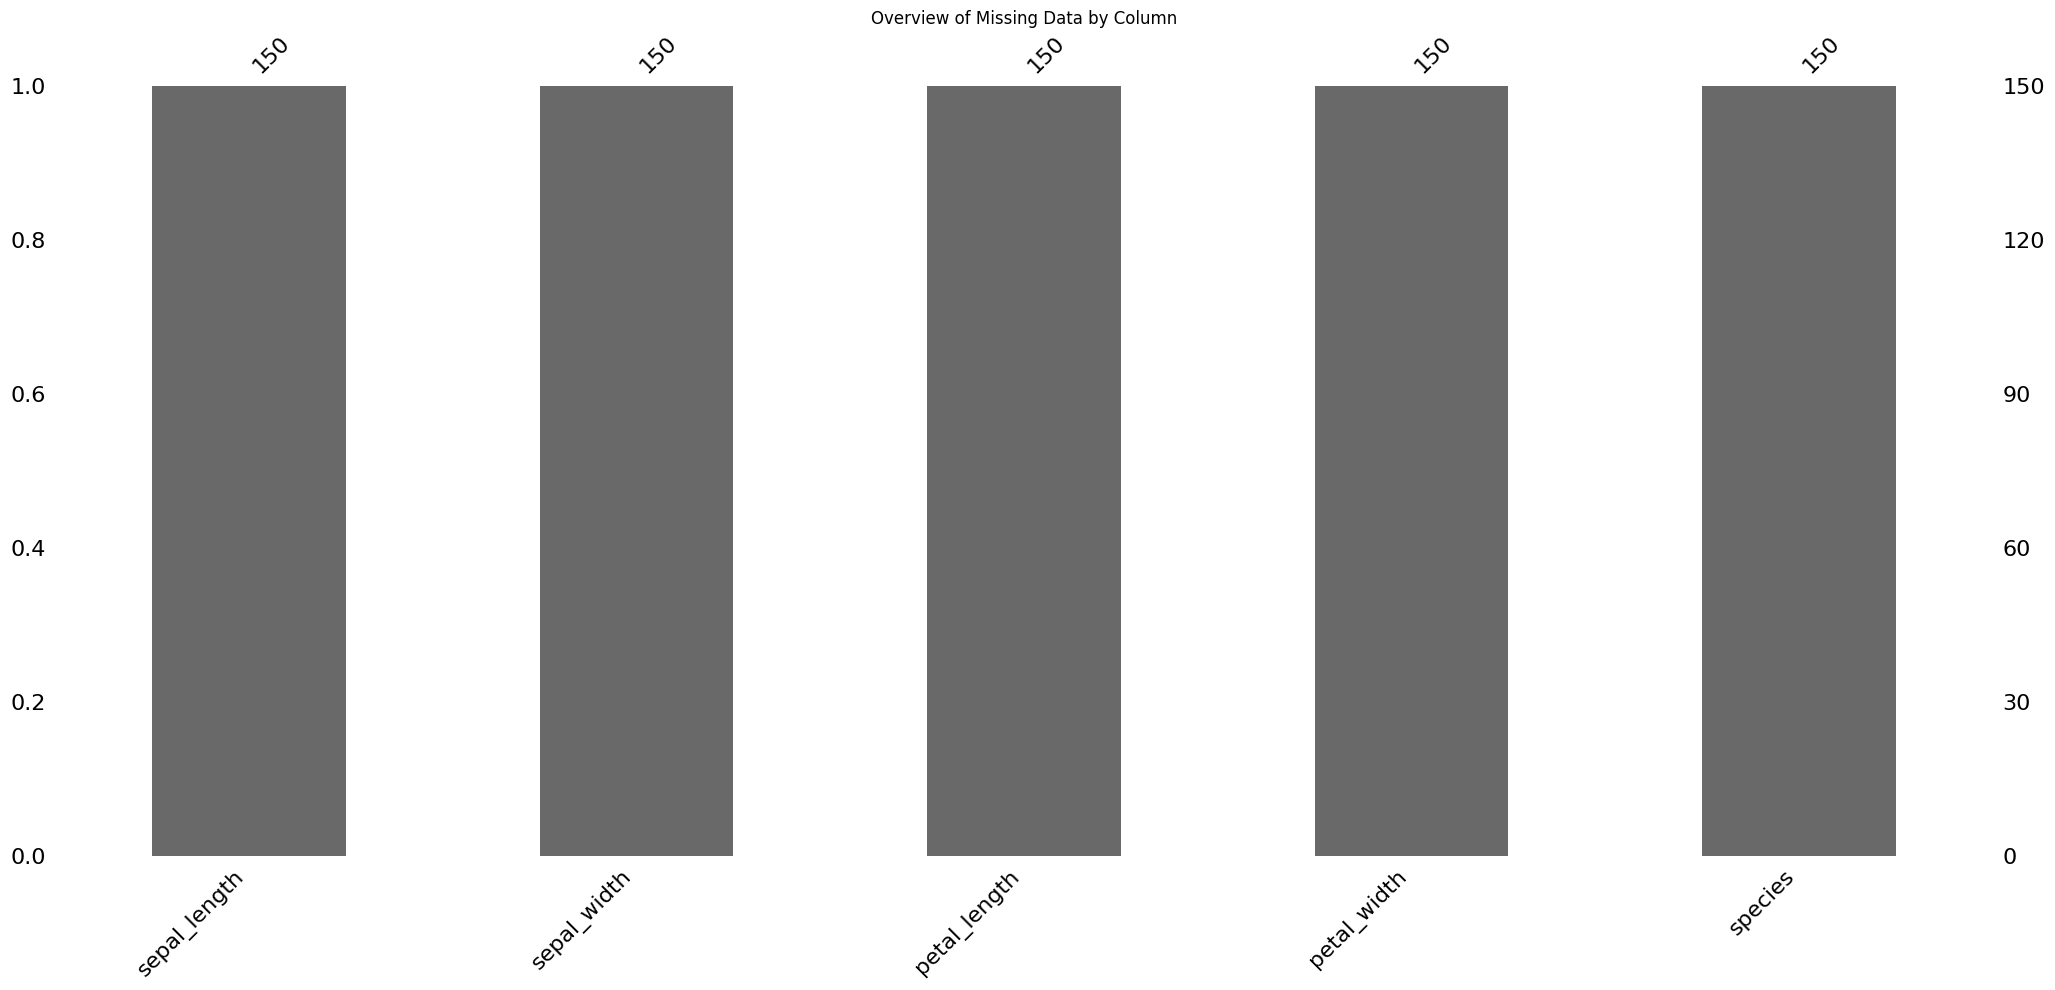

In [ ]:
###Exploratory Data Analysis

###checking for missing values

# Bar Plot (Nullity by Column)

msno.bar(df)
plt.title("Overview of Missing Data by Column")
plt.show()

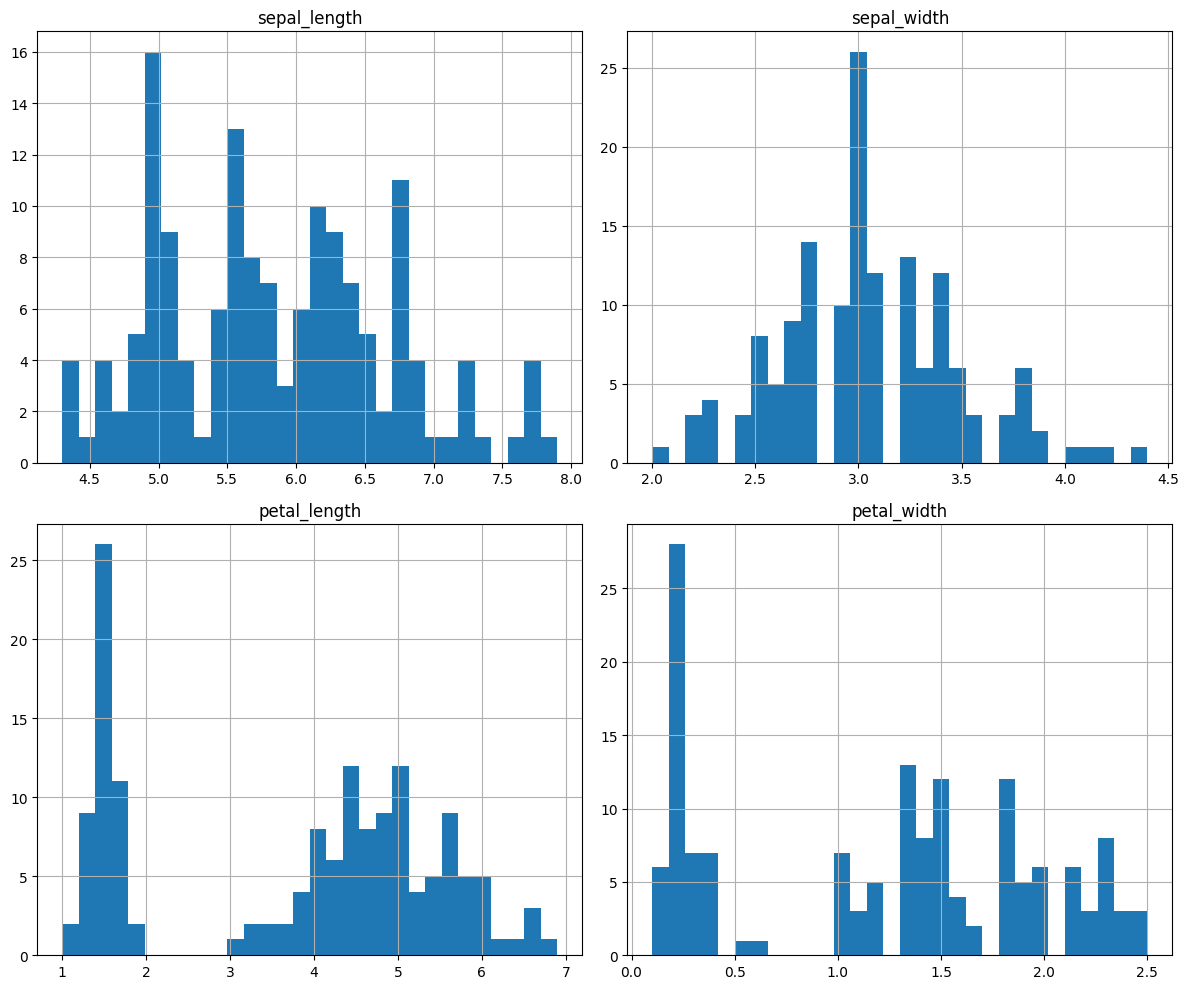

In [ ]:
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
###train-test split

y = df['species']
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
###arbitary model checking
#MinMaxScaler +KNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

###arbitrary paramter
classifier= Pipeline([
    ("scl", MinMaxScaler()), ##feature scaling
    ("predictor", KNeighborsClassifier(n_neighbors=30)) ###classifier
])

##crossvalidation accuracy
print(np.mean(cross_val_score(classifier, X_train, y_train, scoring="accuracy")))
###crossvalidation error
print(round(1-np.mean(cross_val_score(classifier, X_train, y_train, scoring="accuracy")),3))

0.9416666666666667
0.058


In [ ]:
from sklearn.metrics import accuracy_score
classifier.fit(X_train, y_train)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9


In [ ]:
# MinMax scaler + Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifierDt=Pipeline(
    [
        ("scl", MinMaxScaler()),
        ("predictor", DecisionTreeClassifier())
    ]
)

# Get the validation error
print(np.mean(cross_val_score(classifierDt, X_train, y_train, scoring="accuracy")))

###crossvalidation error
round(1-np.mean(cross_val_score(classifierDt, X_train, y_train, scoring="accuracy")),3)

0.9416666666666668


np.float64(0.067)

In [ ]:
classifierDt.fit(X_train, y_train)

print(accuracy_score(y_test, classifierDt.predict(X_test)))

0.9333333333333333
